In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cftime as cf
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
from datetime import datetime, timedelta
import numpy as np
from shapely.geometry import box

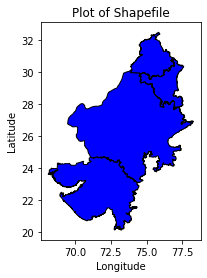

In [15]:
from shapely.geometry import mapping

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile)
desired_values = ['Gujarat', 'Rajasthan', 'Haryana', 'Punjab']
filtered_gdf = gdf[gdf['State_Name'].isin(desired_values)]
filtered_gdf.to_file('NW_India.shp')

# Read the clipped shapefile 
shapefile_nw = gpd.read_file('NW_India.shp')
target_crs = 'EPSG:4326'  # EPSG code for WGS 84
# Convert the CRS of the GeoDataFrame
gdf_nw = shapefile_nw.to_crs(target_crs)
# # Print information about the converted GeoDataFrame
# print(gdf)
# Plot the shapefile
fig, ax = plt.subplots()
gdf_nw.plot(ax=ax, color='blue', edgecolor='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Plot of Shapefile')
plt.show()

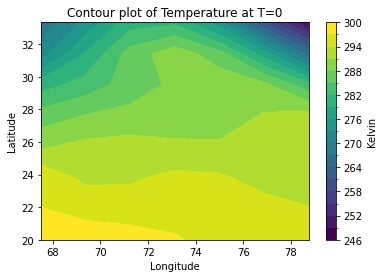

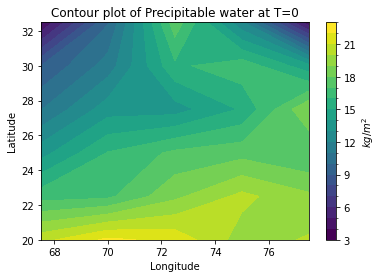

In [18]:
# Read in the variable files and the shapefile

temp_file = 'surface_temp.nc'
precip_file = 'precip_water_NW.nc'
shapefile = 'india shapefile/India_State_Boundary.shp'

#This function plots the nc file and stores the area averaged file to excel
def plot_nc_file(file_name,variable, units, title, output_name):
    ds = xr.open_dataset(file_name, decode_times=False)
    # Create a contour plot
    ds[variable].isel(T=0).plot.contourf(levels=20, cmap='viridis', cbar_kwargs={'label': units})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.show()
    
    # Get the bounding box of the shapefile
    bbox = box(*gdf_nw.total_bounds)
    ds_clipped = ds.sel(X=slice(bbox.bounds[0], bbox.bounds[2]), Y=slice(bbox.bounds[1], bbox.bounds[3]))
    # Average the grid cells over the entire area and get a timeseries out of it
    time_series = ds_clipped.mean(dim=['X', 'Y'])
    df = time_series.to_dataframe()
    df = df.reset_index()
    df.to_excel(output_name, index=False)

plot_nc_file(temp_file, 'temp', 'Kelvin', 'Contour plot of Temperature at T=0', 'temp.xlsx')

plot_nc_file(precip_file, 'PWAT', '$kg/m^2$','Contour plot of Precipitable water at T=0', 'precip.xlsx')

